In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##**Content Table**


In [2]:
#import the Content.csv files
#load the data into object data
content = pd.read_csv('Content.csv')
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [3]:
#droping the unnecessary variable/feature/columns
content1 = content.copy()
content1 = content1.drop(['Unnamed: 0','URL','User ID'], axis=1)


In [4]:
content1.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [5]:
#renaming the column 'Type' to 'content_type' so we can work with this columns intuitively
content1 = content1.rename(columns={'Type':'content_type'})

In [6]:
content1.describe(include='all')

,Content ID,content_type,Category
count,1000,1000,1000
unique,1000,4,41
top,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,technology
freq,1,261,71


In [7]:
#checking the number of respective unique values within the column 'Category'
content1['Category'].value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

In [8]:
content1['Category'].value_counts().values.sum()

1000

In [9]:
content1['Category'].value_counts().shape

(41,)

In [10]:
content1['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [11]:
number_reactions = pd.DataFrame()
number_reactions['Category'] = content1['Category'].value_counts().index
number_reactions['Num_reaction'] = content1['Category'].value_counts().values

In [12]:
number_reactions

,Category,Num_reaction
0,technology,71
1,animals,67
2,travel,67
3,culture,63
4,science,63
5,fitness,61
6,food,61
7,healthy eating,61
8,cooking,60
9,soccer,58


In [13]:
num_of_reaction = number_reactions.head(10)

In [14]:
num_of_reaction

,Category,Num_reaction
0,technology,71
1,animals,67
2,travel,67
3,culture,63
4,science,63
5,fitness,61
6,food,61
7,healthy eating,61
8,cooking,60
9,soccer,58


In [15]:
num_of_reaction.to_csv('num_of_reaction.csv', index=False)

In [16]:
#replacing the unnecessary quote (") using replace function
content1['Category'] = content1['Category'].str.replace('"','')
#replacing the uppercase letter into lowercase letter
content1['Category'] = content1['Category'].str.lower()

In [17]:
content1['Category'].value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: Category, dtype: int64

In [18]:
#checking the null values within the content's data
content1.isnull().sum()

Content ID      0
content_type    0
Category        0
dtype: int64

In [19]:
#checking the content's data
#1000 refers to rows, 3 refers to columns number
content1.shape

(1000, 3)

In [20]:
#saving the cleaned data with csv format
content1.to_csv('Content_cleaned.csv', index=False)

##**Reaction type**


In [21]:
#import the 'reaction type.csv' files
#load the data into object data
reactiontypes = pd.read_csv('ReactionTypes.csv')
reactiontypes.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [22]:
#droping the unnecessary columns
reactiontypes1 = reactiontypes.copy()
reactiontypes1 = reactiontypes1.drop(['Unnamed: 0'], axis=1)
reactiontypes1.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [23]:
#examine the data through the count, unique, mode, most frequent values, and more
reactiontypes1.describe(include='all')

,Type,Sentiment,Score
count,16,16,16.000000
unique,16,3,NaN
top,heart,positive,NaN
freq,1,9,NaN
mean,NaN,NaN,39.625000
std,NaN,NaN,26.901983
min,NaN,NaN,0.000000
25%,NaN,NaN,14.250000
50%,NaN,NaN,40.000000
75%,NaN,NaN,66.250000


In [24]:
#checking the unique value within the 'Type' column
reactiontypes1['Type'].value_counts()

heart          1
want           1
disgust        1
hate           1
interested     1
indifferent    1
love           1
super love     1
cherish        1
adore          1
like           1
dislike        1
intrigued      1
peeking        1
scared         1
worried        1
Name: Type, dtype: int64

In [25]:
#checking the unique value within the 'Sentiment' column
reactiontypes1['Sentiment'].value_counts()

positive    9
negative    5
neutral     2
Name: Sentiment, dtype: int64

In [26]:
#thecking the existence of missing_values or null values 
reactiontypes1.isnull().sum()

Type         0
Sentiment    0
Score        0
dtype: int64

In [27]:
#saving the cleaned data with csv format
reactiontypes1.to_csv('ReactionTypes_cleaned.csv', index=False)

##**Reaction**


In [28]:
#import 'Reaction.csv' file and stored it into object data
reaction = pd.read_csv('Reactions.csv')
reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [29]:
reaction1 = reaction.copy()
#droping the unnecessary columns
reaction1 = reaction1.drop(['Unnamed: 0','User ID'], axis=1)
reaction1.head()

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [30]:
reaction1.describe(include='all')

,Content ID,Type,Datetime
count,25553,24573,25553
unique,980,16,25542
top,4b2d0fff-3b4f-43ca-a7df-c430479cb9ba,heart,2020-10-29 20:51:08
freq,49,1622,2


In [31]:
#checking the missing value/null data
reaction1.isnull().sum()

Content ID      0
Type          980
Datetime        0
dtype: int64

In [32]:
#checking the number of rows and columns
reaction1.shape

(25553, 3)

In [33]:
reaction1_null_clean = reaction1.copy()
#drop the missing value by rows direction
reaction1_null_clean = reaction1_null_clean.dropna()

In [34]:
#the number of rows after the removal of missing values
reaction1_null_clean.shape

(24573, 3)

In [35]:
#checking the null/missing values again
reaction1_null_clean.isnull().sum()

Content ID    0
Type          0
Datetime      0
dtype: int64

In [36]:
#saving the cleaned data localy with csv format
reaction1_null_clean.to_csv('Reactions_cleaned.csv', index=False)

##**Merging the tables into one**


In [38]:
reaction_cleaned = pd.read_csv('Reactions_cleaned.csv')
content_cleaned = pd.read_csv('Content_cleaned.csv')
joined_table_1 = pd.merge(reaction_cleaned,content_cleaned, on='Content ID', how='inner')
#joining two data using merge function, by 'Content ID' columns

In [39]:
joined_table_1

,Content ID,Type,Datetime,content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


In [40]:
reaction_type = pd.read_csv('ReactionTypes_cleaned.csv')
joined_table = pd.merge(joined_table_1, reaction_type, on = 'Type', how='inner')
#joining two data using merge function, by 'Type' columns

In [41]:
#sorting the table's order by Score's
joined_table

,Content ID,Type,Datetime,content_type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72


In [42]:
joined_table.Score.value_counts()

70    3040
60    1622
15    1572
35    1559
5     1552
30    1549
10    1548
72    1548
65    1534
0     1526
50    1520
75    1519
20    1512
12    1497
45    1475
Name: Score, dtype: int64

##**Fixing the datetime format**

In [43]:
type(joined_table.Datetime[0])

str

In [44]:
pd.to_datetime('01/10/2017 10:15:17 PM',format = '%m/%d/%Y %H:%M:%S %p')

Timestamp('2017-01-10 10:15:17')

In [45]:
joined_table.Datetime = pd.to_datetime(joined_table.Datetime, format = '%Y-%m-%d %H:%M:%S')

In [46]:
type(joined_table.Datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

In [47]:
joined_table.head()

,Content ID,Type,Datetime,content_type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0


In [48]:
joined_table.Category.value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

In [49]:
#creating new dataset with datetime splitted into datetime, year and month columns
date_inspect_table = joined_table.copy()
date_inspect_table = date_inspect_table.sort_index()
def month(data):
  return data.month
def year(data):
  return data.year


In [50]:

date_inspect_table['Year'] = date_inspect_table['Datetime'].apply(year)
date_inspect_table['Month'] = date_inspect_table['Datetime'].apply(month)
date_inspect_table.head()

,Content ID,Type,Datetime,content_type,Category,Sentiment,Score,Year,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0,2020,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0,2021,1
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0,2021,4
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0,2021,3
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0,2020,8


In [51]:
date_inspect_table.Month.value_counts()

5     2138
1     2126
8     2114
12    2092
7     2070
10    2056
11    2034
9     2022
6     2021
3     2012
4     1974
2     1914
Name: Month, dtype: int64

In [52]:
date_inspect_table.Month = date_inspect_table.Month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
date_inspect_table

,Content ID,Type,Datetime,content_type,Category,Sentiment,Score,Year,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0,2020,November
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0,2021,January
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0,2021,April
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0,2021,March
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0,2020,August
...,...,...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72,2020,October
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72,2020,September
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72,2020,October
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72,2020,June


In [53]:
date_inspect_table.Month.value_counts()

May          2138
January      2126
August       2114
December     2092
July         2070
October      2056
November     2034
September    2022
June         2021
March        2012
April        1974
February     1914
Name: Month, dtype: int64

In [54]:
date_inspect_table.to_csv('date_inspect_table.csv',index=False)

In [55]:
all_year_top_month = pd.DataFrame()
all_year_top_month['Month'] = date_inspect_table.Month.value_counts().index
all_year_top_month['Num_of_post'] = date_inspect_table.Month.value_counts().values
all_year_top_month.to_csv('all_year_top_month.csv', index=False)
all_year_top_month
#this is the table consist the number of content posted over 2 year 

,Month,Num_of_post
0,May,2138
1,January,2126
2,August,2114
3,December,2092
4,July,2070
5,October,2056
6,November,2034
7,September,2022
8,June,2021
9,March,2012


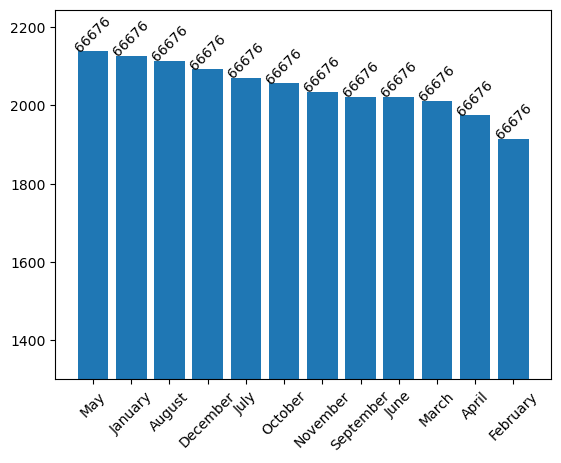

In [75]:
plt.bar(x='Month', height = 'Num_of_post', data =all_year_top_month)
plt.ylim(bottom = 1300)
plt.xticks(rotation=45)
for index, row in enumerate(all_year_top_month['Num_of_post']):
  plt.text(x = index, y = row, ha='center',s = f"{data}", fontsize=10, rotation=45)
plt.show()
#through this bar chart, we know that may is the month has highest number of content posted over 2 year

In [58]:
table_2020 = pd.DataFrame()
table_2020['Month'] = date_inspect_table[date_inspect_table['Year'] == 2020].Month.value_counts().index
table_2020['Num_of_post'] = date_inspect_table[date_inspect_table['Year'] == 2020].Month.value_counts().values
table_2020.head()
#this is the table consist of month and the number of content posted in 2020

,Month,Num_of_post
0,August,2114
1,December,2092
2,July,2070
3,October,2056
4,November,2034


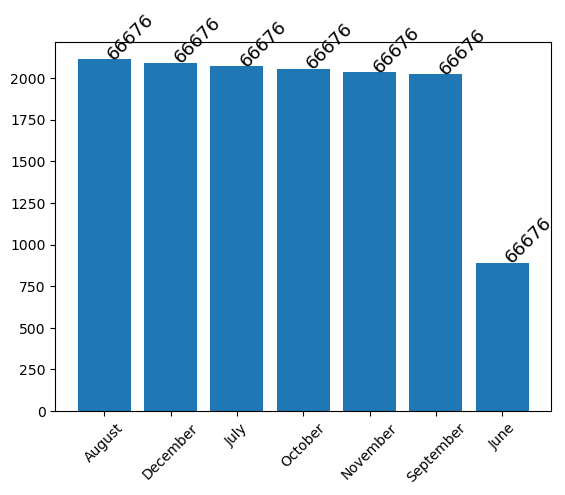

In [74]:
plt.bar('Month', 'Num_of_post', data = table_2020)
plt.xticks(rotation=45)
for index, row in enumerate(table_2020['Num_of_post']):
  plt.text(x = index, y = row ,s = f"{data}",fontsize=13, rotation=45)
plt.show()
#august is has the highest number of content posted in 2020

In [63]:
table_2020.to_csv('table_2020.csv', index=False)

In [64]:
table_2021 = pd.DataFrame()
table_2021['Month'] = date_inspect_table[date_inspect_table['Year'] == 2021].Month.value_counts().index
table_2021['Num_of_post'] = date_inspect_table[date_inspect_table['Year'] == 2021].Month.value_counts().values
table_2021.head()
#this is the table consist month and the number of content posted in 2021

,Month,Num_of_post
0,May,2138
1,January,2126
2,March,2012
3,April,1974
4,February,1914


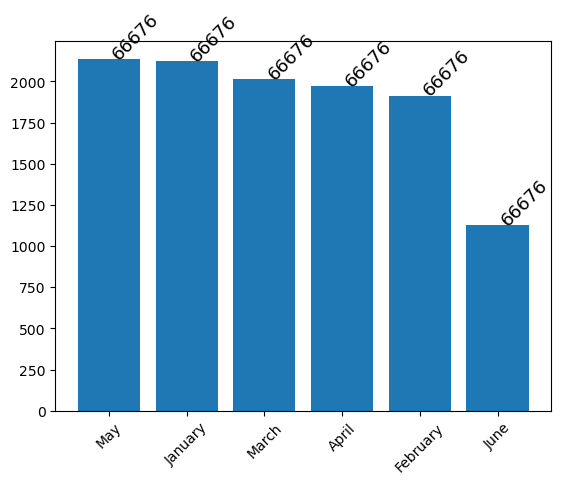

In [73]:
plt.bar('Month','Num_of_post', data = table_2021)
plt.xticks(rotation=45)
for index, row in enumerate(table_2021.Num_of_post):
  plt.text(index, row, s = f"{data}", fontsize=13, rotation=45)
plt.show()
#may has the highest number of content posted in 2021

In [66]:
table_2021.to_csv('table_2021.csv', index=False)

In [67]:
#saving the cleaned table localy, with csv format
joined_table.to_csv('Clean_joined_table.csv', index=False)

In [68]:
joined_table.Category.value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

In [69]:
#grouping the data by category
categories_score = joined_table.groupby('Category').sum().sort_values(by=['Score'], ascending=False).nlargest(5, 'Score')
categories_score = categories_score.reset_index()
categories_score 
#this is table consist category and the score

,Category,Score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


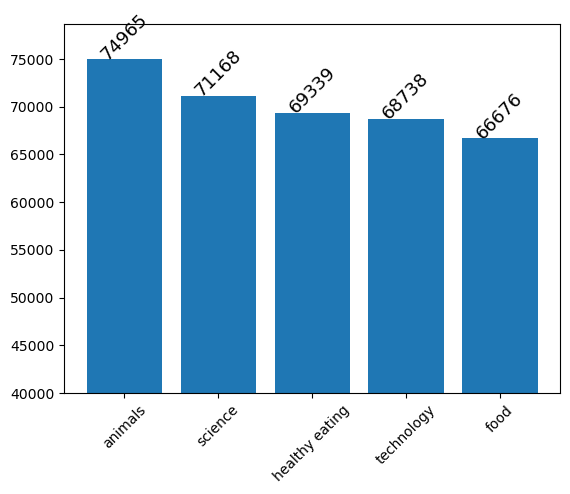

In [70]:
barplot = plt.bar(x ='Category', height ='Score', data = categories_score)
plt.ylim(bottom=40000)
plt.xticks(rotation=45)
for index, data in enumerate(categories_score['Score']):
  plt.text(x=index, y=data, s = f"{data}", ha='center', fontsize=13, rotation=45)
plt.show()
#animal has the highest score of content category

(-1.1390529897528003,
 1.1233716126105489,
 -1.120070361002018,
 1.182993219040801)

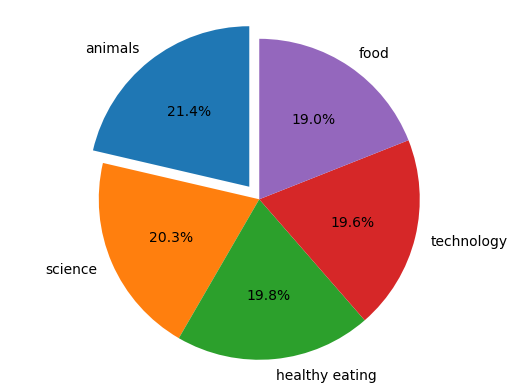

In [76]:
fig1, ax1 = plt.subplots()
ax1.pie(categories_score.Score, labels = categories_score.Category,explode=(0.1,0,0,0,0) ,autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

In [72]:
categories_score.to_csv('Top_5_table.csv', index=False)